# Import Libraries and Dataset

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
#read data set
data_train = pd.read_csv('kendaraan_train.csv')

# Eksploration and Preparing Data

In [52]:
#info dataset
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [53]:
#5 data awal dari dataset
data_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [54]:
#menghitung data nan/null dari tiap kolom (dalam %)
data_train.isnull().sum().sort_values(ascending=False)/len(data_train)*100

Premi                5.097068
Jenis_Kelamin        5.051936
SIM                  5.039341
Kode_Daerah          5.005055
Kanal_Penjualan      5.002606
Umur_Kendaraan       4.994210
Sudah_Asuransi       4.978116
Umur                 4.972869
Kendaraan_Rusak      4.963772
Lama_Berlangganan    4.895200
Tertarik             0.000000
id                   0.000000
dtype: float64

In [75]:
#drop data dengan nilai nan/null
data_train = data_train.dropna()
len(data_train)

171068

In [76]:
#drop kolom yang tidak dipakai
data_train = data_train.drop(columns=['Tertarik'])
data_train = data_train.drop(columns=['id'])
data_train = data_train.drop(columns=['Kanal_Penjualan'])
data_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,158.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,63.0
5,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,171.0
8,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,31.0


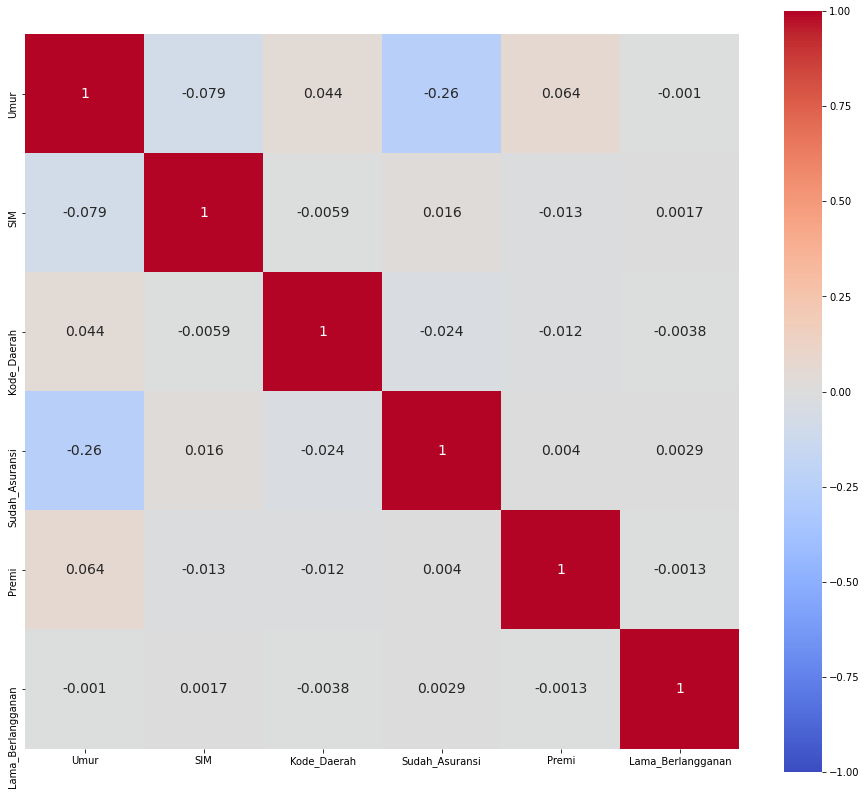

In [57]:
#plot heatmap untuk melihat korelasi dari dataset
fig, ax = plt.subplots(figsize=(16,14))
sns.heatmap(data_train.corr(), annot=True, ax=ax, square=True, cmap='coolwarm', vmin=-1,vmax=1, annot_kws={'size': 14})
plt.show()

# Handling Outlier

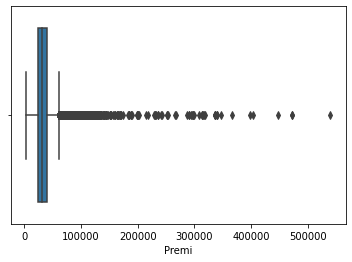

In [58]:
#plot boxplot untuk melihat data outlier
sns.boxplot(x = 'Premi', data = data_train)

In [59]:
#menentukan nilai upperbound dan lower bound
#diambil dari nilai quantile data

q1 = data_train['Premi'].quantile(0.25)
q3 = data_train['Premi'].quantile(0.75)
iqr = q3-q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
print(lower_bound, upper_bound)

#untuk data outlier diatas dari upperbound, maka akan direplace dengan nilai upperbound
for i in range(len(data_train)):
    if data_train['Premi'].iloc[i] > upper_bound:
        data_train['Premi'].iloc[i] = upper_bound    

1939.5 61753.5


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


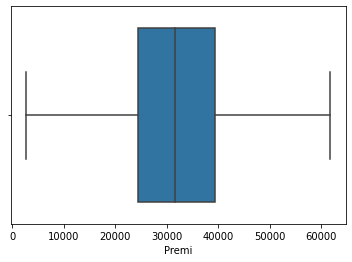

In [60]:
#plot data setelah tidak ada outlier
sns.boxplot(x = 'Premi', data = data_train)

# Labeling Categorical Data

In [62]:
from sklearn.preprocessing import LabelEncoder

#labeling untuk data categorical ordinal
le_Umur_Kendaraan = LabelEncoder()
data_train['Umur_Kendaraan'] = le_Umur_Kendaraan.fit_transform(data_train['Umur_Kendaraan'])

In [63]:
#labeling untuk data categorical nominal

dummies = pd.get_dummies(data_train['Jenis_Kelamin'], prefix='jenkel')
data_train = pd.concat([data_train, dummies], axis=1)
data_train = data_train.drop(['Jenis_Kelamin'], axis = 1)

dummies = pd.get_dummies(data_train['Kode_Daerah'], prefix='daerah')
data_train = pd.concat([data_train, dummies], axis=1)
data_train = data_train.drop(['Kode_Daerah'], axis = 1)

dummies = pd.get_dummies(data_train['SIM'], prefix='sim')
data_train = pd.concat([data_train, dummies], axis=1)
data_train = data_train.drop(['SIM'], axis = 1)

dummies = pd.get_dummies(data_train['Sudah_Asuransi'], prefix='asuransi')
data_train = pd.concat([data_train, dummies], axis=1)
data_train = data_train.drop(['Sudah_Asuransi'], axis = 1)

dummies = pd.get_dummies(data_train['Kendaraan_Rusak'], prefix='kendaraan_rusak')
data_train = pd.concat([data_train, dummies], axis=1)
data_train = data_train.drop(['Kendaraan_Rusak'], axis = 1)

In [64]:
data_train.head()

,Umur,Umur_Kendaraan,Premi,Lama_Berlangganan,jenkel_Pria,jenkel_Wanita,daerah_0.0,daerah_1.0,daerah_2.0,daerah_3.0,daerah_4.0,daerah_5.0,daerah_6.0,daerah_7.0,daerah_8.0,daerah_9.0,daerah_10.0,daerah_11.0,daerah_12.0,daerah_13.0,daerah_14.0,daerah_15.0,daerah_16.0,daerah_17.0,daerah_18.0,daerah_19.0,daerah_20.0,daerah_21.0,daerah_22.0,daerah_23.0,daerah_24.0,daerah_25.0,daerah_26.0,daerah_27.0,daerah_28.0,daerah_29.0,daerah_30.0,daerah_31.0,daerah_32.0,daerah_33.0,daerah_34.0,daerah_35.0,daerah_36.0,daerah_37.0,daerah_38.0,daerah_39.0,daerah_40.0,daerah_41.0,daerah_42.0,daerah_43.0,daerah_44.0,daerah_45.0,daerah_46.0,daerah_47.0,daerah_48.0,daerah_49.0,daerah_50.0,daerah_51.0,daerah_52.0,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak
0,30.0,1,28029.0,97.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,48.0,2,25800.0,158.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3,58.0,0,2630.0,63.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1
5,21.0,1,22735.0,171.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
8,20.0,1,30786.0,31.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


# Scaling Data

In [65]:
from sklearn.preprocessing import MinMaxScaler

#scaling data dengan minmax scaler agar menjadi di rentang yang sama[0,1]
scaler = MinMaxScaler()
data_train['Premi'] = scaler.fit_transform(data_train[['Premi']])
data_train['Umur'] = scaler.fit_transform(data_train[['Umur']])
data_train['Lama_Berlangganan'] = scaler.fit_transform(data_train[['Lama_Berlangganan']])
data_train

,Umur,Umur_Kendaraan,Premi,Lama_Berlangganan,jenkel_Pria,jenkel_Wanita,daerah_0.0,daerah_1.0,daerah_2.0,daerah_3.0,daerah_4.0,daerah_5.0,daerah_6.0,daerah_7.0,daerah_8.0,daerah_9.0,daerah_10.0,daerah_11.0,daerah_12.0,daerah_13.0,daerah_14.0,daerah_15.0,daerah_16.0,daerah_17.0,daerah_18.0,daerah_19.0,daerah_20.0,daerah_21.0,daerah_22.0,daerah_23.0,daerah_24.0,daerah_25.0,daerah_26.0,daerah_27.0,daerah_28.0,daerah_29.0,daerah_30.0,daerah_31.0,daerah_32.0,daerah_33.0,daerah_34.0,daerah_35.0,daerah_36.0,daerah_37.0,daerah_38.0,daerah_39.0,daerah_40.0,daerah_41.0,daerah_42.0,daerah_43.0,daerah_44.0,daerah_45.0,daerah_46.0,daerah_47.0,daerah_48.0,daerah_49.0,daerah_50.0,daerah_51.0,daerah_52.0,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak
0,0.153846,1,0.429592,0.301038,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,0.430769,2,0.391892,0.512111,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3,0.584615,0,0.000000,0.183391,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1
5,0.015385,1,0.340051,0.557093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
8,0.000000,1,0.476223,0.072664,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285826,0.046154,1,0.395071,0.716263,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
285827,0.015385,1,0.711325,0.138408,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
285828,0.046154,1,0.796993,0.747405,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
285829,0.738462,0,0.471437,0.899654,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


# Model Kmeans

In [66]:
#model kmeans dengan bentuk class
class Kmeans:
  def __init__(self, k, max_iter):
    self.k = k
    self.max_iter = max_iter
    self.centroid = []

  #perhitungan jarak dengan euclidean
  def euclidean(self, x1, x2):
    distance = np.sqrt(((x2-x1)**2).sum(axis=0))
    return distance

  def fit(self,data):

    #label cluster awal diset default menjadi -1 terlebih dahulu 
    labels = [-1]*len(data)

    #pemilihan cluster awal secara random sebanyak k
    self.centroid = data.sample(self.k)
    self.centroid = self.centroid.to_numpy()

    data = data.to_numpy()

    for i in range(self.max_iter):
      #nilai inertia untuk menghitung wcss yang berguna untuk elbow method
      self.inertia = 0
      #clusters untuk pengumpulan data berdasarkan cluster, digunakan untuk menghitung mean pada centroid nanti
      clusters = [[] for i in range(self.k)]

      for x in range(len(data)):
        
        #menghitung jarak tiap data ke tiap centroid
        distance = []
        for indeks in range(len(self.centroid)):
          distance.append(self.euclidean(data[x], self.centroid[indeks]))
        #memasukkan data ke cluster terdekat
        label = distance.index(min(distance))
        clusters[label].append(data[x])
        labels[x] = label

        self.inertia += (min(distance))**2

      #pergantian tiap centroid dengan mean tiap cluster
      temp = np.copy(self.centroid)
      for indeks in range(self.k):
        self.centroid[indeks] = np.mean(clusters[indeks], axis=0)

      #pengecekan kondisi berhenti kmeans, apakah centroid sama dengan sebelumnya atau tidak
      condition = temp == self.centroid
      if condition.all():
        break
    
    #function fit mengembalikan label cluster tiap data
    return labels

# Kmeans Experiment

In [67]:
#percobaan kmeans dengan k=2 dan max_iterasi = 100
max_iter = 100
k = 2
model = Kmeans(k, max_iter)
label_train = model.fit(data_train)

In [68]:
from sklearn.decomposition import PCA
#penggunaan PCA untuk mereduksi semua kolom feature menjadi 2 dimensi agar dapat dilihat persebaran cluster dengan baik
pca = PCA(n_components=2)
pca = pca.fit_transform(data_train)
df = pd.DataFrame()

df['X-pca'] = pca[:,0]
df['Y-pca'] = pca[:,1]
df['cluster'] = label_train

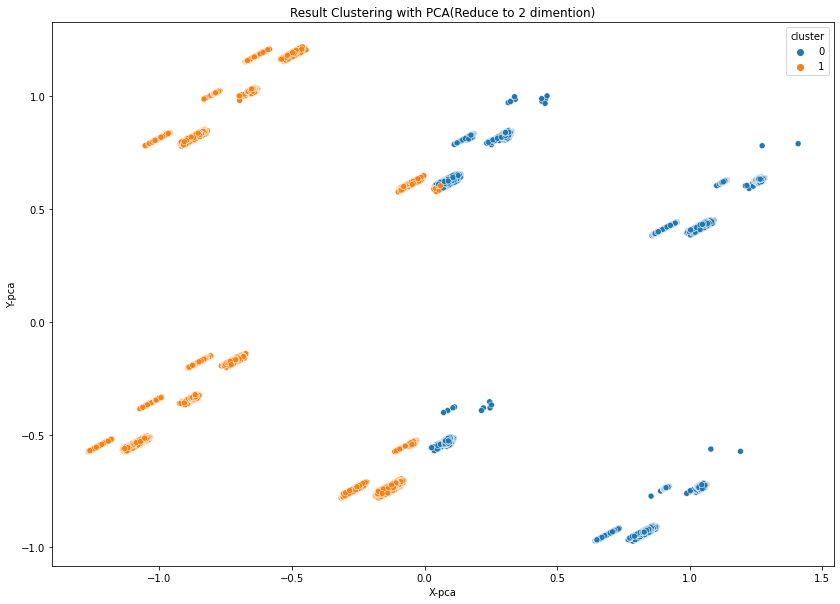

In [73]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=df, x="X-pca", y="Y-pca", hue="cluster")
plt.title('Result Clustering with PCA(Reduce to 2 dimention)')
plt.show()

# Elbow Method

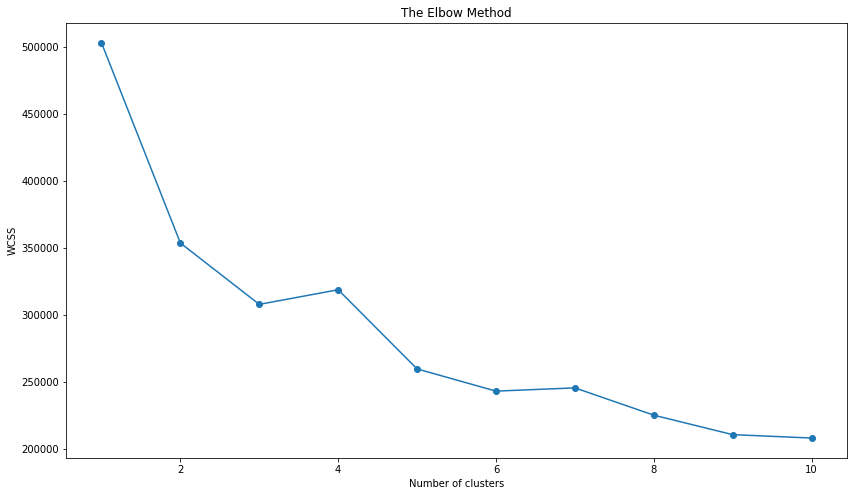

In [71]:
#menjalankan elbow method
wcss = []
for i in range(1, 11):

  kmeans = Kmeans(i, 100)
  kmeans.fit(data_train)
  wcss.append(kmeans.inertia)

plt.figure(figsize=(14,8))
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss)
#memberikan label plot dengan judul The Elbow Method
plt.title('The Elbow Method')
#memberikan label x dengan nama Number of clusters
plt.xlabel('Number of clusters')
#memberikan label y dengan nama WCSS
plt.ylabel('WCSS')
#menampilkan plot
plt.show()

In [72]:
#menggabungkan data hasil eksplorasi dengan label clusternya masing-masing
data_cluster = data_train.copy()
data_cluster["Cluster"] = label_train
data_cluster.head()

,Umur,Umur_Kendaraan,Premi,Lama_Berlangganan,jenkel_Pria,jenkel_Wanita,daerah_0.0,daerah_1.0,daerah_2.0,daerah_3.0,daerah_4.0,daerah_5.0,daerah_6.0,daerah_7.0,daerah_8.0,daerah_9.0,daerah_10.0,daerah_11.0,daerah_12.0,daerah_13.0,daerah_14.0,daerah_15.0,daerah_16.0,daerah_17.0,daerah_18.0,daerah_19.0,daerah_20.0,daerah_21.0,daerah_22.0,daerah_23.0,daerah_24.0,daerah_25.0,daerah_26.0,daerah_27.0,daerah_28.0,daerah_29.0,daerah_30.0,daerah_31.0,daerah_32.0,daerah_33.0,daerah_34.0,daerah_35.0,daerah_36.0,daerah_37.0,daerah_38.0,daerah_39.0,daerah_40.0,daerah_41.0,daerah_42.0,daerah_43.0,daerah_44.0,daerah_45.0,daerah_46.0,daerah_47.0,daerah_48.0,daerah_49.0,daerah_50.0,daerah_51.0,daerah_52.0,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak,Cluster
0,0.153846,1,0.429592,0.301038,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
1,0.430769,2,0.391892,0.512111,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
3,0.584615,0,0.000000,0.183391,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
5,0.015385,1,0.340051,0.557093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
8,0.000000,1,0.476223,0.072664,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [80]:
#hasil dataframe penggabungan tadi diexport kedalam bentuk file csv
data_cluster.to_csv("data_cluster.csv", index=False)